![Practicum AI Logo image](images/practicum_ai_logo.png) <img src='images/practicumai_deep_learning.png' alt='Practicum AI: Deep Learning Foundations icon' align='right' width=50>

***
# *Practicum AI:* Deep Learning Basics

This exercise is inspired by Baig et al. (2020) <i>The Deep Learning Workshop</i> from <a href="https://www.packtpub.com/product/the-deep-learning-workshop/9781839219856">Packt Publishers</a> (Exercise 1.01, page 7).

## Deep learning for image recognition

Before diving into exactly _how_ deep learning works, let's explore it through an example. We will explore just a few of the fantastic things you can do with existing models and see how easy it can be to implement AI tools with code. 

In this exercise, we will use a pre-trained deep learning model, [ResNet50](https://arxiv.org/abs/1512.03385), which has been trained on [ImageNet](https://image-net.org/), a collection of about 1.3 million images labeled as being in one of 1,000 categories. We won't focus on the details of ResNet50, but understand that it is a deep learning image classification model developed to categorize images into one of the 1,000 categories in the ImageNet dataset. Like many models, it is openly available and can be seamlessly imported into your notebook with or without the learned weights.

To help with this exercise, let us introduce you to our heroine,  Dr. Amelia. <img alt="A cartoon of Dr. Amelia, a nutrition researcher, sitting at a computer thinking about food items which appear in a thought bubble." src="images/DrAmelia.jpg" padding=20 align="right" width=250>

Amelia is a research nutritionist who is conducting a dietary study in which she analyzes her participants' diets. Experience has shown her that when asked to report the details of their meals, participants frequently either do not enter the data or misreport what they ate. For Amelia's new study, she hopes to have them take photos of their meals and use AI to analyze their diet automatically. As a first step, she wants to test a model to see how well it can recognize a food item from a photo.

Dr. Amelia doesn't have much data yet but has learned that using pre-trained models for many tasks is possible, and she hopes to avoid starting her project from scratch. As a prototype, we will help Amelia develop her AI-powered food recognition system!

**Note:** Dr. Amelia's cartoon was generated with AI's assistance.

Amelia is a *Practicum AI* alumna and recalls the AI Application Development Pathway. 

![Practicum AI Application Pathway Image](images/application_dev_pathway.png) 

With her food image processing task, she has already completed Step 1: Choose a Problem! Due to the flexible nature of coding, implementing the following steps will jump around a bit. Don't worry; Amelia knows her stuff and will ensure we know where we are in the development process. Here is an overview of the steps in the application development process and how they correspond to the code in this Jupyter Notebook:

1. Choose a Problem - Make a food item classifier that takes an input image and returns the predicted food object!
2. Gather Good Data - Amelia is very busy; she doesn't have time to take thousands of food images! Instead, she will use a model that has already been trained to "recognize" various food items (and hundreds of other things!).
3. Clean and Prep Data - The model she is using already has training data, so she doesn't need to worry about prepping her training data. However, she will have to work to ensure that her new inputs are formatted correctly.
4. Choose a Model - Amelia needs a model that is already trained and recognizes images. That narrows her search to models like ResNet (though there is an ever-growing list of possibilities here!).
5. Train the Model - Our heroine will use a pre-trained model, so... Done! She is up and running with an AI application without compiling or training anything.
6. Evaluate the Model - As part of the evaluation process, Amelia will need to test the model to see how well it recognizes food.
7. Deploy the Model - Amelia is comfortable using Jupyter Notebooks, so she will leave the application here for this initial proof of concept. Embedding the model in another application is unnecessary (and beyond the scope of this course!).

### <img src='images/note_icon.svg' width=40, align='center' alt='Note icon'> Note

> While you may not be looking to classify food items (or have a very different AI project in mind), note that in many cases, there are models with which you start. The relative openness of AI researchers in sharing their models has enabled the community to:
>   * Use a trained model "out of the box," as Amelia will.
>   * Fine-tune a model with some of your data.
>   * Use an existing model architecture and train with your data.
>   * Modify an existing model architecture and train with your data.
> Rarely is there a need to start from scratch!

## 1. Import libraries

Import the necessary libraries. For this exercise, Amelia will use the pre-trained ResNet50 model that is part of Keras: `tensorflow.keras.applications.resnet50`. Check out the [Keras documentation](https://www.tensorflow.org/api_docs/python/tf/keras/applications/resnet50/ResNet50) for more details. 

### <img src='images/note_icon.svg' width=40, align='center' alt='Note icon'> Note
> Remember not all red is bad. Read through the output. The most likely error that you will encounter in the cell below that is a real issue is the failure to import a library. For example: `ModuleNotFoundError: No module named 'gtts'`. See the following code block on fixing that if needed. Most other warnings that we see can typically be ignored.

In [12]:
# Troubleshooting steps- tensorflow would not install with the pythonv3.13
# Went to website and installed v3.10 (copy to path- customize- allow multiple users)
# Using cmd install tensorflow: pip install tensorflow
# Went to run code in Jupyter nb- error message to upgrade pip so in cmd prompt: python.exe -m pip install --upgrade pip
# Error: System requirement for tensorflow satisified but not found
# Check python environment and saw using python v3.13 which does not support tensorflow
import sys
print(sys.executable)

# Install IPython Kernel for Python 3.10
# bash: python -m pip install ipykernel

# Register Python 3.10 as a Jupyter kernel
# bash: python -m ipykernel install --user --name=python310

# Switch kernel in JB
# Close JB
# bash: cd deep_learning
# bash: jupyter notebook
# Select kernel - change kernel - choose python3.10 - run code without errors.

# Install necessary packages- use ! before pip to run shell commands in Jupyter notebook 
# because cannot run pip install directly inside a Python script or interpreter.
!pip install tensorflow
!pip install gTTS

# Import necessary libraries for image processing and deep learning. 
# The image processing functions, like img_to_array, will help Amelia format the image to run through her model.

from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.applications.resnet50 import decode_predictions

# Import base tensorflow and set seed to achieve consistent results.
import tensorflow as tf 
import numpy as np

# Import Google text-to-speech used later in the notebook.
from gtts import gTTS
import os

# Set the seed for reproducibility.
seed = 42  

tf.random.set_seed(seed)
np.random.seed(seed)

C:\Program Files\Python310\python.exe
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [ ]:
# If you are using a system that doesn't have gTTS you may need to install it.
# If you get an import error, use the following code (without the hashtag, of course) to install gTTS:
# !pip install gTTS

# Once installed, re-run the main import block to import everything.

>## <img src='images/alert_icon.svg' alt="Alert icon" width=40 align=center> Did you get an error here?
>
>If you got an error running the cell above, it is probably because the environment you are working in doesn't have `numpy` or `pandas` installed.
>
>### For Google Colab
>
>On Google Colab, this shouldn't be an issue (for these libraries), and if you do run into this in the future, it is generally OK (and expected in Colab) to use `!pip install ___` to install a library. In Colab, each notebook is independent of other notebooks, so the installation of packages has limited impact. But, be especially careful doing this on HPC systems; installing things that cause compatibility issues is easy.
>
>### For Jupyter on HPC systems
>
>For most of what the *Practicum AI* courses cover, an environment (known as a **kernel**) will be ready for you to use. Check the kernel if you run into an error about a missing library. The current kernel is shown in the top right of the notebook:
>
>![Screenshot of a Jupyter notebook showing the currently selected kernel](images/kernel.png)
>
>For this notebook on HiPerGator, we will use the **Tensorflow-2.15** kernel.

## 2. Instantiate the Resnet50 model

Instantiating is a programming term that means taking the 'blueprint' of something (in this case, ResNet50) and making an object out of it (the model we will use here). This step creates the instance of the model to use.

### <img src='images/note_icon.svg' width=40, align='center' alt='Note icon'> Some Background on ResNet 
> ResNet, which stands for Residual Network, won the 2015 ImageNet competition. It was introduced to address the vanishing gradient problem commonly faced when training very deep neural networks. As networks become deeper, gradients (the values used to update network weights) can become extremely small, effectively halting training. 
> ResNet introduces the concept of "residual blocks."  As it processes data, instead of relying solely on the current "thought" or layer, it can also "refer back" to earlier layers, much like using recent memories to help recall older ones. These "references back" are called skip connections. They act like bridges, letting the network jump over some layers to ensure that even as it delves deeper into processing, it remembers and retains important early details. This shortcut or skip connection allows gradients to propagate more easily through the network. 
> This architectural innovation has enabled the training of networks with depths previously thought infeasible. With hundreds or even thousands of layers, ResNet models have achieved state-of-the-art performance on many image classification benchmarks. 
> In this unit’s exercise, we used the ResNet50 model, which, as its name suggests, consists of 50 layers.

```python
# Create an instance of the ResNet50 model pre-trained on ImageNet data
my_model = ResNet50()
```

In [14]:
# Code it!
my_model = ResNet50()

## 3. Load image

While developing her system, Amelia will use a test image of her favorite pizza to test the system. Let's load in her pizza image.

Since ResNet50 was trained using images that are 224X224 pixels, we need to transform the input image to be the same size.

### <img src='images/tip_icon.svg' width=40, align='center' alt='Tip icon'> Tip
> The pizza image is stored in the images folder; the complete path of the
> location where the image is located must be given.


```python
# Load an image file for testing, resizing it to the required input size of 224x224 pixels
my_image = load_img('images/pizza.jpg', target_size = (224, 224))
```


> If running on Google Colab, you have a couple of choices:
>
> 1. Change the `'images/pizza.jpg'` to use the web location of the 
> image in this repository:
> `'https://raw.githubusercontent.com/PracticumAI/deep_learning/main/images/pizza.jpg'`
> 1. Find any image of pizza, and upload it using the Files tab as in 
> the image below. Then right click and "Copy path", and use that path. [Click here](images/colab_img_upload.png) to see an screenshot of this if needed. 

In [3]:
# Code it!
# Got an error that 'load_img' not defined bc not in current Python env
# The function is part of tensorflow.keras.preprocessing.image
# Fix
from tensorflow.keras.preprocessing.image import load_img
my_image = load_img('images/pizza.jpg', target_size = (224, 224))

## 4. View the pizza image

Let's take a quick look at the image to verify that it's a pizza.  Type the variable name and run the code block.

```python
my_image
```

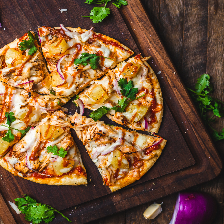

In [4]:
# Code it!

my_image

## 5. Convert image to array

Convert the image to an array because the model expects it in this format. Take a quick look at the output too.

```python
# Convert the loaded image to an array format suitable for processing
my_image = img_to_array(my_image) 
# View what my_image looks like now
my_image 
```

In [6]:
# Code it!
# Got same error about img_to_array not being defined so first imported it as follows
from tensorflow.keras.preprocessing.image import img_to_array
my_image = img_to_array(my_image)
my_image

array([[[ 70.,  42.,  41.],
        [ 85.,  54.,  49.],
        [ 64.,  42.,  44.],
        ...,
        [ 93.,  70.,  56.],
        [ 83.,  64.,  50.],
        [104.,  75.,  57.]],

       [[ 61.,  35.,  34.],
        [ 72.,  43.,  39.],
        [ 73.,  43.,  43.],
        ...,
        [ 86.,  64.,  51.],
        [ 77.,  59.,  49.],
        [ 93.,  70.,  54.]],

       [[ 83.,  48.,  44.],
        [ 67.,  43.,  41.],
        [ 90.,  52.,  49.],
        ...,
        [ 74.,  57.,  49.],
        [ 71.,  54.,  44.],
        [ 95.,  68.,  49.]],

       ...,

       [[ 85.,  56.,  40.],
        [139., 105.,  80.],
        [110.,  79.,  61.],
        ...,
        [ 31.,  23.,  20.],
        [ 19.,  18.,  16.],
        [ 42.,  33.,  28.]],

       [[ 99.,  66.,  49.],
        [148., 108.,  82.],
        [ 99.,  73.,  56.],
        ...,
        [ 32.,  24.,  21.],
        [ 21.,  20.,  18.],
        [ 38.,  29.,  24.]],

       [[ 90.,  61.,  47.],
        [146., 109.,  82.],
        [147., 1

## 6. Reshape image

Reshape the image.  All images fed to this model need to be 224 pixels high and 224 pixels wide, with 3 channels, one for each color (red, green, blue).  If our image was grayscale, how many channels would we specify?

```python
# Reshape the image array to the format the model expects (batch size, height, width, color channels)
my_image = my_image.reshape((1, 224, 224, 3)) 
```

In [7]:
# Code it!
my_image = my_image.reshape((1, 224, 224, 3))

## 7. Preprocess image

Execute the *preprocess_input()* function, which we imported from `tensorflow.keras.applications.resnet50`,  with the image as input.

```python
# Preprocess the image to ensure its values are appropriate for the ResNet50 model
my_image = preprocess_input(my_image) 
# View the output
my_image
```

In [10]:
# Code it!
from tensorflow.keras.applications.resnet50 import preprocess_input
my_image = preprocess_input(my_image)
my_image

array([[[[-157.619, -191.558, -186.619],
         [-142.619, -179.558, -178.619],
         [-163.619, -191.558, -183.619],
         ...,
         [-134.619, -163.558, -171.619],
         [-144.619, -169.558, -177.619],
         [-123.619, -158.558, -170.619]],

        [[-166.619, -198.558, -193.619],
         [-155.619, -190.558, -188.619],
         [-154.619, -190.558, -184.619],
         ...,
         [-141.619, -169.558, -176.619],
         [-150.619, -174.558, -178.619],
         [-134.619, -163.558, -173.619]],

        [[-144.619, -185.558, -183.619],
         [-160.619, -190.558, -186.619],
         [-137.619, -181.558, -178.619],
         ...,
         [-153.619, -176.558, -178.619],
         [-156.619, -179.558, -183.619],
         [-132.619, -165.558, -178.619]],

        ...,

        [[-142.619, -177.558, -187.619],
         [ -88.619, -128.558, -147.619],
         [-117.619, -154.558, -166.619],
         ...,
         [-196.619, -210.558, -207.619],
         [-208.619, -2

### <img src='images/note_icon.svg' width=40, align='center' alt='Note icon'> What is returned by `preprocess_input()`? 

> From the documentation, you will see that the `tensorflow.keras.applications.resnet50.preprocess_input` function returns:
>  > The images are converted from RGB to BGR, then each color channel is zero-centered with respect to the ImageNet dataset, without scaling.
>
> Again, this function is designed to get input images into the format that was used in training the model. It's a bit of an odd format (non-standard color channel order and not scaled), but that's what was used during training, so that is what we need to use at inference time.

## 8. Execute predict method

Execute the model's predict method.

```python
# Use the model to predict the class (or category) of the image
my_result = my_model.predict(my_image) 
# View the result
my_result 
```

In [15]:
# Code it!
my_result = my_model.predict(my_image)
my_result

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


array([[1.85021020e-06, 1.61924345e-05, 1.23316513e-08, 1.49516133e-08,
        2.62450641e-07, 3.58025147e-07, 5.14597900e-07, 4.27717168e-06,
        3.22358211e-08, 1.27878238e-07, 1.49666501e-08, 1.62095279e-08,
        5.15339167e-08, 1.85804154e-08, 5.44138743e-07, 2.95216864e-07,
        1.43874590e-09, 2.22524636e-06, 2.37573499e-06, 2.89129254e-08,
        1.41059866e-08, 4.76180784e-09, 7.91968713e-09, 9.24394605e-09,
        1.07166231e-08, 2.37245877e-06, 5.60396067e-08, 2.18766968e-06,
        1.30103890e-05, 5.20565209e-08, 9.12179439e-06, 4.63596990e-07,
        1.31183663e-06, 5.35784920e-07, 1.54199176e-06, 6.39992140e-05,
        1.55692014e-05, 4.24928730e-05, 1.25302449e-06, 1.33996336e-05,
        3.44687578e-07, 4.70973049e-07, 5.20116373e-07, 8.71076793e-07,
        1.73936883e-06, 2.48269293e-06, 6.27767622e-06, 2.98318440e-07,
        1.51562212e-08, 1.80657366e-07, 2.01097038e-07, 1.64240873e-07,
        8.95303344e-07, 1.60474872e-06, 1.63450454e-06, 2.394851

How could you verify that there are 1,000 numbers in the `my_result` variable?

* Try coding that.
* You may get a clearly incorrect answer. Look closely at how `my_result` printed and see if you can figure out how to get the number of values.
   * Hint, how many square bracket sets are there in `my_result`? 

In [1]:
# Code it


## 9. Get prediction label

The model's predict method returns an array with 1,000 numbers. Each number is the "probability" that the input image belongs to the corresponding category. The category list is in [this text file](ImageNet_1K_labels.txt).

Convert this to its corresponding text label. We could find the maximum value and look up the category, but the `decode_predictions` function does this for us. According to [the documentation](https://www.tensorflow.org/api_docs/python/tf/keras/applications/resnet50/decode_predictions), `decode_predictions` returns: class name, class label and probability of the top five results by default.

```python
# Decode the prediction result to get human-readable class labels
my_label = decode_predictions(my_result) 
my_label
```

In [16]:
# Code it!
my_label = decode_predictions(my_result)
my_label


35363/35363 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step


[[('n02747177', 'ashcan', np.float32(0.3460938)),
  ('n02909870', 'bucket', np.float32(0.2914185)),
  ('n02795169', 'barrel', np.float32(0.0758265)),
  ('n03657121', 'lens_cap', np.float32(0.045631584)),
  ('n02965783', 'car_mirror', np.float32(0.039842542))]]

## 10. Assign list item to a variable 

Assign the first item listed by the prediction to a variable - this is the label with the highest probability.

* Extract the label with the highest predicted probability. 
   * Recalling that in Python, all indexes start at 0, the [0][0] indexing retrieves the first prediction from the first batch of results.

```python
my_label = my_label[0][0] 
my_label
```

In [17]:
# Code it!
my_label = my_label[0][0]
my_label

('n02747177', 'ashcan', np.float32(0.3460938))

## 11. Print the label 

Include the label in a sentence and then print it.

* The `my_label` variable contains information about the prediction in the format (ID, Label, Probability).
* Using `my_label[1]` extracts the human-readable label (e.g., 'pizza') for the predicted class.

```python
# Print the predicted class label in a formatted string
print(f"This is an image of a {my_label[1]}!") 
```

In [22]:
# Code it!
my_label
my_label[1]

'ashcan'

### <img src='images/tip_icon.svg' width=40, align='center' alt='Tip icon'> Tip
> Although we use an image of a pizza here, you can use just about any image with
> this model. Try out this exercise multiple times with different images to see if 
> you can fool it. The [ImageNet_1K_labels.txt](https://raw.githubusercontent.com/PracticumAI/deep_learning/main/Image_Net_1K_labels.txt) 
> file lists all the image categories this model is trained to classify.

## 12. Create a speech sentence

As a busy scientist, Dr. Amelia tries to multi-task as much as possible. Now that she has the image recognition step worked out, she wants to add an audio component to her program to read the results while working out at the gym.

Luckily, text-to-speech technology is as easy to implement as image recognition! Let's help Amelia get the next step of her prototype up and running!

Create a longer sentence to convert to speech. 
```python
say_it = f"This participant is eating {my_label[1]} today."
```

In [23]:
# Code it!
say_it = f"This participant is eating {my_label[1]} today."

## 13. Execute the gtts function

Pass the say_it variable to the gTTS API.

```python
my_speech = gTTS(text = say_it)
```

In [24]:
# Code it!
my_speech = gTTS(text = say_it)

## 14. Save the audio file

gTTS will convert the string you gave it into an audio file. Save the audio file. The default location is the current directory.

```python
# Save the audio file in the current directory.
my_speech.save("prediction.mp3") 
```

In [25]:
# Code it!
my_speech.save("prediction.mp3")

### <img src='images/note_icon.svg' width=40, align='center' alt='Note icon'> Note
> This last block of code is only needed if you are running Jupyter Notebooks 
> on a local computer.  Otherwise, download the .mp3 file from your HPC system and
> listen to it on your computer.

In [26]:
# Uncomment and run if running on local system as opposed to HPC or Google Colab
# os.system("prediction.mp3")
os.system("prediction.mp3")

0

## 15. Let's put it all together

We can put all of these steps together in a function to make it easier to test more images.

In [29]:
def what_are_they_eating(image):
    '''Takes an image and returns a ResNet50 prediction.'''
    my_image = load_img(image, target_size = (224, 224))
    my_image = img_to_array(my_image)
    my_image = my_image.reshape((1, 224, 224, 3))
    my_image = preprocess_input(my_image)
    my_result = my_model.predict(my_image)
    my_label = decode_predictions(my_result)

    return my_label[0][0]

def tell_me_what_they_ate(label):
    '''Takes a label and returns a mp3 speech file with the item that was eaten.'''
    say_it = f"This participant is eating {label} today."
    my_speech = gTTS(text = say_it)
    my_speech.save(f"{label}_prediction.mp3")
    os.system(f"{label}_prediction.mp3")
    print(f"Sound file saved to {label}_prediction.mp3")

In [30]:
# Now run on a new image of pizza
# Image courtesy of Ruslan Khmelevsky https://www.pexels.com/photo/a-pizza-inside-the-brick-oven-14129177/
label = what_are_they_eating('images/hawaiian_pizza_khmelevsky.jpg')
print(label)

tell_me_what_they_ate(label[1])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step
('n07875152', 'potpie', np.float32(0.5203977))
Sound file saved to potpie_prediction.mp3


## 16. Test other items
Amelia should also test with some other food items to ensure her system is working. Let's try this burger.

![Photo of a hamburger](images/hamburger.jpg)

In [31]:
label = what_are_they_eating('images/hamburger.jpg')
print(label)

tell_me_what_they_ate(label[1])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
('n07697313', 'cheeseburger', np.float32(0.7626679))
Sound file saved to cheeseburger_prediction.mp3


#### How did that work?
 
Amelia's classifier works well, predicting that the image is a cheeseburger. But...I don't see any cheese on that burger! Why do you think the cheeseburger category was selected? Remember to look at the [ImageNet categories](ImageNet_1K_labels.txt). 

Remember, a model will output probabilities of the categories it was trained on, and all the output probabilities must sum to one. The model has no mechanism to tell you it doesn't recognize the image!


## 17. More challenges

Hmm...While reviewing some predictions, Amelia discovers a problem. Did the participant eat pizza again? or is this a quiche?

![A photo of quiche](images/quiche.jpg)

In [32]:
label = what_are_they_eating('images/quiche.jpg')
print(label)

tell_me_what_they_ate(label[1])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
('n07873807', 'pizza', np.float32(0.28774607))
Sound file saved to pizza_prediction.mp3


Again, consider the importance of training data representing the data used when the model is deployed. Recognize the limitations of models to make predictions based on the training categories. 

These issues relate to the discussion of AI ethics and how well your AI model will work. If the training data do not represent the data used in deployment, AI models will be of limited value and can even be misleading. The consequences may be manageable for Amelia's research study, but we must carefully evaluate the performance and suitability of all AI models as we work with them.

Hopefully, this fun exercise showed how easy it can be to use AI models to accomplish everyday tasks like image classification and text-to-speech. 

### Further refinement

As we have helped Dr. Amelia discover, she may be unable to use ResNet50 trained on ImageNet for her task. There are too few food categories to work reliably for her study. Does that mean she needs to start from scratch?

No! In a future *Practicum AI* course, you can learn about **transfer learning**. Transfer learning allows you to take a model trained on one dataset and fine-tune it for a new dataset. With transfer learning, you can harness the information a model has learned about its training data, 1,000 categories of objects in the case of ImageNet, and add new information specific to your task. The advantage here is that you typically need far less data to train a model to recognize many food types, for example, when it already knows about food and many other things in the world!


Please tune in to our next notebook to see what Amelia is up to next!


## Bonus Exercises

1. Change the code so that if the confidence of the model's prediction is less than 0.75, the code output says it's not sure what the image is.
1. Change the code to output the top *n* categories and their probabilities.
1. Change the code so that each loaded image has its label added to a list saved to a text file.


## Before continuing
###  <img src='images/alert_icon.svg' alt="Alert icon" width=40 align=center> Alert!
> Before continuing to another notebook within the same Jupyter session,
> use the **"Running Terminals and Kernels" tab** (below the File Browser tab) to **shut down this kernel**. 
> This will free up this notebook's GPU memory, making it available for
> your next notebook.
>
> Every time you run multiple notebooks within a Jupyter session with a GPU, this should be done.
>
> ![Screenshot of the Running Terminals and Kernels tab used t oshut down kernels before starting a new notebook](images/stop_kernel.png)

----
## Push changes to GitHub <img src="images/push_to_github.png" alt="Push to GitHub icon" align="right" width=150>

 Remember to **add**, **commit**, and **push** the changes you have made to this notebook to GitHub to keep your repository in sync.

In Jupyter, those are done in the git tab on the left. In Google Colab, use File > Save a copy in GitHub.


In [ ]:
# bash: cd deep_learning
# bash: git status
# Show branch main up to date; changes not staged for commit; shows untracked files
# bash: git add deep_learning #to include what will be committed